In [2]:
# import bayesopt
import gpbayesopt as bayesopt
import numpy as np
from functools import partial

import matplotlib.pyplot as plt

In [3]:
def f(x):
    return x*np.sin(x)

In [7]:
# %%timeit
BO = bayesopt.BayesOpt(f=f,
                       initial_input=np.array([0.]),
                       acq=bayesopt.acquisition.LCB,
                       acq_optim=bayesopt.acquisition_optimizer.Acquisition_L_BFGS_B_Optimizer(bounds=np.array([0,18])))
BO.run_optim(50)

/usr/local/lib/python3.7/site-packages/jax/lib/xla_bridge.py:119: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')
BayesOpt: 100%|██████████| 50/50 [00:44<00:00,  1.12it/s, param:[1.02207053], value:0.8720201952198819, current best param:[17.33688331], current best_value:-17.307606382756944]  


# GPyOpt

In [8]:
import GPyOpt

In [9]:
bounds = [{'name': 'x1', 'type': 'continuous', 'domain': (0,18)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, X=np.array([[0.]]),domain=bounds,acquisition_type='LCB',)
myBopt.run_optimization(max_iter=50,eps=0)

## vs

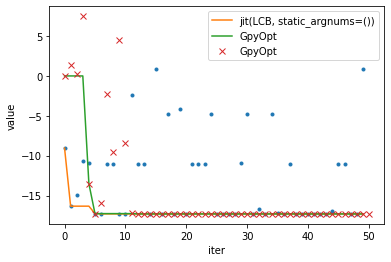

In [10]:
bayesopt.plot_history(BO)
# plt.yscale('log')
plt.plot([np.min(myBopt.Y[:i+1]) for i in range(50)],label='GpyOpt')
plt.plot(myBopt.Y,'x',label='GpyOpt')
plt.legend()

# Speed test


In [15]:
BO = bayesopt.BayesOpt(f=f,
                       initial_input=np.array([0.]),
                       acq=partial(bayesopt.acquisition.LCB,kappa=5.),
                       acq_optim=bayesopt.acquisition_optimizer.Acquisition_SLSQP_Optimizer(bounds=np.array([0,18])))
%time BO.run_optim(50)

BayesOpt: 100%|██████████| 50/50 [00:09<00:00,  5.21it/s, param:[11.1590797], value:-11.010248187218357, current best param:[17.33607234], current best_value:-17.307607794400848] 

CPU times: user 11.1 s, sys: 12.9 s, total: 24 s
Wall time: 9.6 s


In [17]:
bounds = [{'name': 'x1', 'type': 'continuous', 'domain': (0,18)}]
myBopt = GPyOpt.methods.BayesianOptimization(f=f, X=np.array([[0]]),domain=bounds,acquisition_type='LCB')
%time myBopt.run_optimization(max_iter=50,eps=0)

CPU times: user 45.8 s, sys: 22.8 s, total: 1min 8s
Wall time: 18.1 s


In [19]:
18.1/9.6

1.885416666666667

低い次元ならGridで20倍くらい。   
同じアルゴリズム(L-BFGS)だと3倍程度. GpyOptのようにGrad入れたらもっと早いかも?